<a href="https://colab.research.google.com/github/lkjh1121/Colab/blob/master/Ch03.%EB%94%A5%EB%9F%AC%EB%8B%9D%20%EC%8B%A4%EC%8A%B5/6_%EB%94%A5%EB%9F%AC%EB%8B%9D_RNN_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
날짜 : 2022/05/12
이름 : 김재현
내용 : 딥러닝 RNN 실습하기
"""
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential

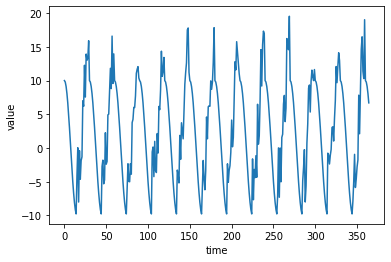

In [2]:
#데이터 생성(시계열)
time = np.arange(365)
month_time = (time % 30) / 30
#month_time

time_series = 10 * np.where(month_time < 0.5, 
                            np.cos(2 * np.pi * month_time),
                            np.cos(2 * np.pi * month_time) + np.random.random(365))

plt.xlabel('time')
plt.ylabel('value')
plt.plot(np.arange(0, 365), time_series[:365])

In [3]:
#데이터 전처리
def make_sequence(time_series, n):
  train_data, train_label = [], []

  for i in range(len(time_series)):
    t = time_series[i:(i+n)]

    if (i+n) < len(time_series):
      train_data.append(t)
      train_label.append(time_series[i+n])
    else:
      break

  return np.array(train_data), np.array(train_label)

train_data, train_label = make_sequence(time_series, 10)
train_label

array([-5.00000000e+00, -6.69130606e+00, -8.09016994e+00, -9.13545458e+00,
       -9.78147601e+00, -4.12530663e+00,  3.45072913e-02, -8.01924385e+00,
       -4.00535209e-01, -4.62899780e+00, -1.86093233e+00, -1.32061810e+00,
        7.00239508e+00,  6.18715243e+00,  1.22697995e+01,  7.55530355e+00,
        1.39336381e+01,  1.30201105e+01,  1.33287698e+01,  1.59096965e+01,
        1.00000000e+01,  9.78147601e+00,  9.13545458e+00,  8.09016994e+00,
        6.69130606e+00,  5.00000000e+00,  3.09016994e+00,  1.04528463e+00,
       -1.04528463e+00, -3.09016994e+00, -5.00000000e+00, -6.69130606e+00,
       -8.09016994e+00, -9.13545458e+00, -9.78147601e+00, -2.73996818e+00,
       -1.80439452e+00, -5.31463168e+00, -4.74084852e+00,  2.25958414e+00,
       -2.39912026e+00, -1.98682064e+00,  4.90661762e+00,  5.02306407e+00,
        8.61554390e+00,  1.18188252e+01,  8.81273707e+00,  1.65979361e+01,
        9.56776599e+00,  1.39577348e+01,  1.00000000e+01,  9.78147601e+00,
        9.13545458e+00,  

In [4]:
#데이터 변환
train_data = train_data.reshape(-1, 10, 1) #자동 x 10 x 1
train_label = train_label.reshape(-1, 1)
train_data.shape

(355, 10, 1)

In [5]:
#학습데이터, 테스트데이터
_train_data = train_data[:300]
_train_label = train_label[:300]

_test_data = train_data[300:]
_test_label = train_label[300:]

_train_data.shape

(300, 10, 1)

In [6]:
#모델설계
model = Sequential()
model.add(SimpleRNN(units=32, activation='tanh', input_shape=(10, 1)))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1088      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [7]:
#모델설정
model.compile(optimizer='adam', loss='mse', metrics=['acc'])

In [8]:
#모델학습
model.fit(_train_data, _train_label, epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 66.0199 - acc: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 55.5912 - acc: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 46.4628 - acc: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 39.7783 - acc: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 34.9905 - acc: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 31.2468 - acc: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 28.1855 - acc: 0.0000e+00
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 25.5266 - acc: 0.0000e+00
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 23.1495 - acc: 0.0000e+00
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 21.0079 - acc: 0.0000e+00
Epoch 11/

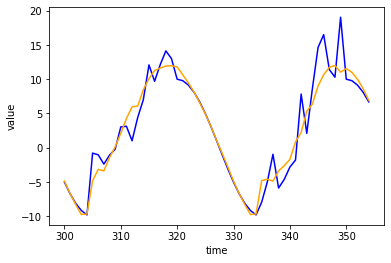

In [9]:
#모델 테스트 시각화
result = model.predict(_test_data)

result_range = np.arange(len(_train_label), len(_train_label) + len(result))

plt.xlabel('time')
plt.ylabel('value')

plt.plot(result_range, _test_label, color='blue', label='label')
plt.plot(result_range, result, color='orange', label='result')
plt.show()